<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/7_2_%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###7.2. Иерархическая кластеризация

#### 1. Введение в иерархическую кластеризацию

Иерархическая кластеризация — это один из методов группировки данных, который находит применение в различных задачах, включая обработку естественного языка (Natural Language Processing, NLP). Цель кластеризации состоит в том, чтобы разделить объекты на группы (кластеры) так, чтобы объекты внутри одной группы были более похожи друг на друга, чем на объекты из других групп.

Иерархическая кластеризация делится на два основных подхода:
- Агломеративная (снизу-вверх) — начинается с каждого объекта в отдельном кластере и объединяет их, пока не останется один кластер.
- Дивизивная (сверху-вниз) — начинается с одного кластера, содержащего все объекты, и рекурсивно делит их на подмножества.

Иерархическая кластеризация формирует иерархию в виде дендрограммы — дерева, где каждый узел представляет кластер, а листья — объекты.

#### 2. Формальные определения и подходы к иерархической кластеризации

##### 2.1 Агломеративная иерархическая кластеризация

Агломеративная кластеризация работает следующим образом:

1. Инициализировать каждый объект в виде отдельного кластера.
2. Найти два наиболее похожих кластера и объединить их.
3. Обновить матрицу расстояний (похожести) с учетом нового объединенного кластера.
4. Повторять шаги 2 и 3, пока не останется один кластер.

Для вычисления расстояния между кластерами используются различные метрики, такие как:

- Минимальное расстояние (single linkage):
  
  $$
  d_{\text{single}}(C_i, C_j) = \min_{x \in C_i, y \in C_j} \|x - y\|
  $$

- Максимальное расстояние (complete linkage):
  
  $$
  d_{\text{complete}}(C_i, C_j) = \max_{x \in C_i, y \in C_j} \|x - y\|
  $$

- Среднее расстояние (average linkage):
  
  $$
  d_{\text{average}}(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} \|x - y\|
  $$

- Центроидное расстояние:
  
  $$
  d_{\text{centroid}}(C_i, C_j) = \|c_i - c_j\|
  $$
  
  где $c_i$ и $c_j$ — центроиды кластеров $C_i$ и $C_j$.

##### 2.2 Дивизивная иерархическая кластеризация

Дивизивная кластеризация, наоборот, начинает с одного кластера, содержащего все объекты, и постепенно делит его на меньшие кластеры. Этот подход включает следующие шаги:

1. Начать с одного кластера, содержащего все объекты.
2. Разделить текущий кластер на два подмножества.
3. Повторять шаг 2 рекурсивно для каждого полученного подмножества, пока каждый объект не окажется в отдельном кластере или не будет достигнуто заданное количество кластеров.

#### 3. Метрики для оценки сходства в задачах NLP

В задачах NLP объекты, как правило, представлены в виде векторов, полученных из текстовых данных. Метрики расстояния между векторами часто основаны на косинусном расстоянии, расстоянии Евклида или манхэттенском расстоянии.

- Косинусное расстояние:
  
  Косинусное сходство измеряет угол между векторами:
  
  $$
  \text{cosine\_similarity}(u, v) = \frac{u \cdot v}{\|u\| \|v\|}
  $$

  Тогда косинусное расстояние:
  
  $$
  d_{\text{cosine}}(u, v) = 1 - \text{cosine\_similarity}(u, v)
  $$

- Евклидово расстояние:
  
  $$
  d_{\text{euclidean}}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
  $$

- Манхэттенское расстояние:
  
  $$
  d_{\text{manhattan}}(u, v) = \sum_{i=1}^n |u_i - v_i|
  $$

#### 4. Примеры иерархической кластеризации в NLP

##### 4.1 Кластеризация документов

Предположим, имеется набор документов, представленных в виде векторов признаков, полученных с помощью техники представления текста, такой как TF-IDF или Word2Vec.

- TF-IDF (term frequency-inverse document frequency) представляет документы в виде вектора, где каждый элемент соответствует взвешенной частоте термина в документе:
  
  $$
  \text{TF-IDF}(t, d, D) = \text{tf}(t, d) \cdot \log \frac{N}{\text{df}(t, D)}
  $$
  
  где $\text{tf}(t, d)$ — частота термина $t$ в документе $d$, $\text{df}(t, D)$ — количество документов в корпусе $D$, содержащих термин $t$, а $N$ — общее количество документов.

Затем вычисляются расстояния между документами, используя одну из вышеупомянутых метрик, и применяется агломеративная или дивизивная кластеризация.

##### 4.2 Кластеризация слов (Word Clustering)

Для задач кластеризации слов часто применяются эмбеддинги слов (например, Word2Vec, GloVe). Эти эмбеддинги представляют слова в виде векторов в высокоразмерном пространстве, где косинусное расстояние между векторами отражает семантическое сходство между словами.

#### 5. Алгоритмы обновления расстояний

Когда два кластера объединяются, необходимо пересчитать расстояния между новым кластером и остальными кластерами. Существуют различные стратегии обновления:

- Метод Варда — минимизирует увеличение суммы квадратов расстояний между объектами и центром их кластера:

  $$
  d_{\text{ward}}(C_i, C_j) = \sqrt{\frac{|C_k| \cdot |C_l|}{|C_k| + |C_l|} \|c_k - c_l\|^2}
  $$

- Метод Ланса-Уильямса — обобщение всех методов обновления, позволяющий выразить расстояние между новым кластером $C_m$ и кластером $C_r$:

  $$
  d(C_m, C_r) = \alpha_i d(C_i, C_r) + \alpha_j d(C_j, C_r) + \beta d(C_i, C_j) + \gamma |d(C_i, C_r) - d(C_j, C_r)|
  $$

  Здесь $\alpha_i$, $\alpha_j$, $\beta$ и $\gamma$ — параметры, зависящие от выбранного метода.

#### 6. Пример иерархической кластеризации на реальных данных

Предположим, у нас есть 5 документов, представленных в виде векторов TF-IDF:

- $ D_1 = [0.2, 0.4, 0.5]$
- $ D_2 = [0.1, 0.3, 0.4]$
- $ D_3 = [0.8, 0.1, 0.2]$
- $ D_4 = [0.7, 0.2, 0.1]$
- $ D_5 = [0.4, 0.8, 0.5]$

Построим матрицу расстояний, используя косинусное расстояние, и применим агломеративную кластеризацию. В каждой итерации будем объединять два ближайших кластера и пересчитывать матрицу расстояний.

1. Инициализация: каждый документ — отдельный кластер.
2. Итерация 1: находим ближайшие кластеры и объединяем их.
3. Итерация 2 и далее: продолжаем объединять кластеры, пока не останется один.

#### 7. Заключение

Иерархическая кластеризация в задачах NLP позволяет решать множество задач, таких как кластеризация текстов, слов и даже предложений. Благодаря способности работать с различными метриками сходства и способами агрегации, этот метод остается актуальным и полезным в исследовании и анализе текстовых данных. Использование иерархических методов позволяет лучше понимать структуру данных и выявлять скрытые паттерны.








### Пример 1: Кластеризация документов

Данные:
Рассмотрим три документа, представленные в виде векторов TF-IDF:

- $ D_1 = [0.2, 0.3, 0.4]$
- $ D_2 = [0.1, 0.4, 0.5]$
- $ D_3 = [0.6, 0.1, 0.2]$

Шаг 1: Вычисление расстояний между документами

Используем косинусное расстояние для определения сходства между векторами.

Косинусное расстояние вычисляется по формуле:

$$
d_{\text{cosine}}(u, v) = 1 - \frac{u \cdot v}{\|u\| \|v\|}
$$

- Расстояние между $ D_1$ и $ D_2$:

  $$
  D_1 \cdot D_2 = 0.2 \cdot 0.1 + 0.3 \cdot 0.4 + 0.4 \cdot 0.5 = 0.02 + 0.12 + 0.20 = 0.34
  $$

  $$
  \|D_1\| = \sqrt{0.2^2 + 0.3^2 + 0.4^2} = \sqrt{0.04 + 0.09 + 0.16} = \sqrt{0.29} \approx 0.5385
  $$

  $$
  \|D_2\| = \sqrt{0.1^2 + 0.4^2 + 0.5^2} = \sqrt{0.01 + 0.16 + 0.25} = \sqrt{0.42} \approx 0.6495
  $$

  $$
  d_{\text{cosine}}(D_1, D_2) = 1 - \frac{0.34}{0.5385 \cdot 0.6495} \approx 1 - \frac{0.34}{0.3494} \approx 1 - 0.971 \approx 0.029
  $$

- Расстояние между $ D_1$ и $ D_3$:

  $$
  D_1 \cdot D_3 = 0.2 \cdot 0.6 + 0.3 \cdot 0.1 + 0.4 \cdot 0.2 = 0.12 + 0.03 + 0.08 = 0.23
  $$

  $$
  \|D_3\| = \sqrt{0.6^2 + 0.1^2 + 0.2^2} = \sqrt{0.36 + 0.01 + 0.04} = \sqrt{0.41} \approx 0.6403
  $$

  $$
  d_{\text{cosine}}(D_1, D_3) = 1 - \frac{0.23}{0.5385 \cdot 0.6403} \approx 1 - \frac{0.23}{0.3444} \approx 1 - 0.668 \approx 0.332
  $$

- Расстояние между $ D_2$ и $ D_3$:

  $$
  D_2 \cdot D_3 = 0.1 \cdot 0.6 + 0.4 \cdot 0.1 + 0.5 \cdot 0.2 = 0.06 + 0.04 + 0.10 = 0.20
  $$

  $$
  d_{\text{cosine}}(D_2, D_3) = 1 - \frac{0.20}{0.6495 \cdot 0.6403} \approx 1 - \frac{0.20}{0.4160} \approx 1 - 0.481 \approx 0.519
  $$

Шаг 2: Составление матрицы расстояний

Теперь мы можем представить расстояния в виде матрицы:

|     | $ D_1$ | $ D_2$ | $ D_3$ |
|--|--|--|--|
| $ D_1$ | 0         | 0.029     | 0.332     |
| $ D_2$ | 0.029     | 0         | 0.519     |
| $ D_3$ | 0.332     | 0.519     | 0         |

Шаг 3: Кластеризация

1. Объединение $ D_1$ и $ D_2$, так как они наиболее близки. Теперь у нас есть два кластера: $ C_1 = \{D_1, D_2\}$ и $ C_2 = \{D_3\}$.
   
2. Пересчет расстояний. Теперь нам нужно пересчитать расстояние между новым кластером $ C_1$ и $ D_3$. Будем использовать метод среднего расстояния:

$$
d(C_1, D_3) = \frac{d(D_1, D_3) + d(D_2, D_3)}{2} = \frac{0.332 + 0.519}{2} \approx 0.426
$$

Теперь матрица расстояний выглядит следующим образом:

|       | $ C_1$ | $ D_3$ |
|-|--|--|
| $ C_1$ | 0         | 0.426     |
| $ D_3$ | 0.426     | 0         |

3. Объединение $ C_1$ и $ D_3$. Теперь у нас есть один кластер, содержащий все документы $ C = \{D_1, D_2, D_3\}$.

Таким образом, мы кластеризовали три документа в один кластер.


### Пример 2: Кластеризация слов (продолжение)

Шаг 1: Вычисление расстояний между словами (продолжение)

- Расстояние между $ W_2$ и $ W_3$:

$$
d(W_2, W_3) = \sqrt{(0 - 0)^2 + (1 - 0)^2 + (0 - 1)^2} = \sqrt{0 + 1 + 1} = \sqrt{2} \approx 1.414
$$

- Расстояние между $ W_2$ и $ W_4$:

$$
d(W_2, W_4) = \sqrt{(0 - 0.8)^2 + (1 - 0.2)^2 + (0 - 0)^2} = \sqrt{(0.8)^2 + (0.8)^2} = \sqrt{0.64 + 0.64} = \sqrt{1.28} \approx 1.134
$$

- Расстояние между $ W_2$ и $ W_5$:

$$
d(W_2, W_5) = \sqrt{(0 - 0.1)^2 + (1 - 0.9)^2 + (0 - 0)^2} = \sqrt{(0.1)^2 + (0.1)^2} = \sqrt{0.01 + 0.01} = \sqrt{0.02} \approx 0.141
$$

- Расстояние между $ W_3$ и $ W_4$:

$$
d(W_3, W_4) = \sqrt{(0 - 0.8)^2 + (0 - 0.2)^2 + (1 - 0)^2} = \sqrt{(0.8)^2 + (0.2)^2 + (1)^2} = \sqrt{0.64 + 0.04 + 1} = \sqrt{1.68} \approx 1.296
$$

- Расстояние между $ W_3$ и $ W_5$:

$$
d(W_3, W_5) = \sqrt{(0 - 0.1)^2 + (0 - 0.9)^2 + (1 - 0)^2} = \sqrt{(0.1)^2 + (0.9)^2 + (1)^2} = \sqrt{0.01 + 0.81 + 1} = \sqrt{1.82} \approx 1.349
$$

- Расстояние между $ W_4$ и $ W_5$:

$$
d(W_4, W_5) = \sqrt{(0.8 - 0.1)^2 + (0.2 - 0.9)^2 + (0 - 0)^2} = \sqrt{(0.7)^2 + (-0.7)^2} = \sqrt{0.49 + 0.49} = \sqrt{0.98} \approx 0.99
$$

Шаг 2: Составление матрицы расстояний

Теперь мы можем представить расстояния между словами в виде матрицы:

|     | $ W_1$ | $ W_2$ | $ W_3$ | $ W_4$ | $ W_5$ |
|--|--|--|--|--|--|
| $ W_1$ | 0         | 1.414     | 1.414     | 0.283     | 1.272     |
| $ W_2$ | 1.414     | 0         | 1.414     | 1.134     | 0.141     |
| $ W_3$ | 1.414     | 1.414     | 0         | 1.296     | 1.349     |
| $ W_4$ | 0.283     | 1.134     | 1.296     | 0         | 0.99      |
| $ W_5$ | 1.272     | 0.141     | 1.349     | 0.99      | 0         |

Шаг 3: Кластеризация

1. Объединение $ W_4$ и $ W_5$, так как они наиболее близки (расстояние 0.99). Теперь у нас есть два кластера: $ C_1 = \{W_4, W_5\}$ и отдельные слова $ W_1, W_2, W_3$.

2. Пересчет расстояний. Теперь нам нужно пересчитать расстояния между кластером $ C_1$ и остальными словами. Будем использовать метод среднего расстояния:

   - Расстояние между $ C_1$ и $ W_1$:

   $$
   d(C_1, W_1) = \frac{d(W_4, W_1) + d(W_5, W_1)}{2} = \frac{0.283 + 1.272}{2} \approx 0.778
   $$

   - Расстояние между $ C_1$ и $ W_2$:

   $$
   d(C_1, W_2) = \frac{d(W_4, W_2) + d(W_5, W_2)}{2} = \frac{1.134 + 0.141}{2} \approx 0.638
   $$

   - Расстояние между $ C_1$ и $ W_3$:

   $$
   d(C_1, W_3) = \frac{d(W_4, W_3) + d(W_5, W_3)}{2} = \frac{1.296 + 1.349}{2} \approx 1.323
   $$

Теперь обновленная матрица расстояний между кластерами и отдельными словами будет выглядеть так:

|     | $ C_1$ | $ W_1$ | $ W_2$ | $ W_3$ |
|--|--|--|--|--|
| $ C_1$ | 0         | 0.778     | 0.638     | 1.323     |
| $ W_1$ | 0.778     | 0         | 1.414     | 1.414     |
| $ W_2$ | 0.638     | 1.414     | 0         | 1.414     |
| $ W_3$ | 1.323     | 1.414     | 1.414     | 0         |

3. Объединение $ W_2$ и $ C_1$, так как они имеют наименьшее расстояние (0.638). Теперь у нас есть кластер $ C_2 = \{W_2, W_4, W_5\}$ и отдельные слова $ W_1$ и $ W_3$.

4. Пересчет расстояний между $ C_2$ и $ W_1, W_3$:

   - Расстояние между $ C_2$ и $ W_1$:

   $$
   d(C_2, W_1) = \frac{d(W_2, W_1) + d(W_4, W_1) + d(W_5, W_1)}{3} = \frac{1.414 + 0.283 + 1.272}{3} \approx 0.656
   $$

   - Расстояние между $ C_2$ и $ W_3$:

   $$
   d(C_2, W_3) = \frac{d(W_2, W_3) + d(W_4, W_3) + d(W_5, W_3)}{3} = \frac{1.414 + 1.296 + 1.349}{3} \approx 1.353
   $$

Теперь обновленная матрица расстояний будет следующей:

|     | $ C_2$ | $ W_1$ | $ W_3$ |
|--|--|--|--|
| $ C_2$ | 0         | 0.656     | 1.353     |
| $ W_1$ | 0.656     | 0         | 1.414     |
| $ W_3$ | 1.353     | 1.414     | 0         |

5. Объединение $ C_2$ и $ W_1$. Теперь у нас есть один кластер, содержащий все слова $ C = \{W_1, W_2, W_3, W_4, W_5\}$.

### Заключение

Оба примера демонстрируют процесс иерархической кластеризации в задачах обработки естественного языка (NLP). Мы использовали простые векторы и вычисления



Чтобы реализовать иерархическую кластеризацию с использованием Python и визуализацией, мы можем воспользоваться библиотеками `scikit-learn`, `scipy`, и `matplotlib`. Ниже представлен код, который выполняет два примера — кластеризацию документов и кластеризацию слов — и визуализирует результаты.


<ipython-input-5-3692be1f1e9c>:18: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_docs = linkage(cosine_distances, method='average')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


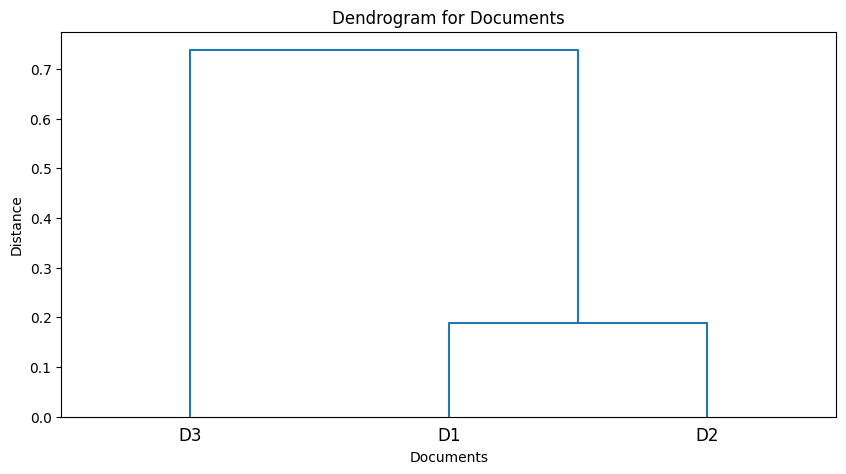

<ipython-input-5-3692be1f1e9c>:47: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_words = linkage(distances, method='average')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


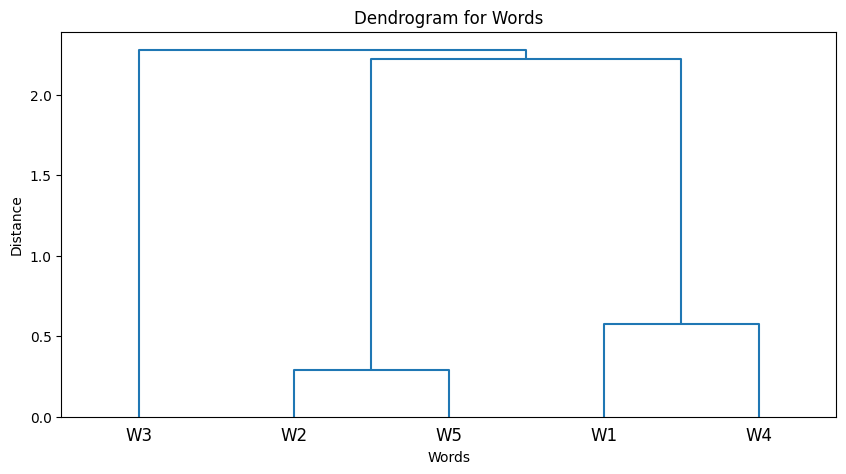

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

# Example 1: Document Clustering

# Data: TF-IDF vectors for 3 documents
documents = np.array([[0.2, 0.3, 0.4],
                      [0.1, 0.4, 0.5],
                      [0.6, 0.1, 0.2]])

# Calculate cosine distance
cosine_distances = 1 - cosine_similarity(documents)

# Create the linkage matrix for dendrogram using the precomputed distance matrix
linkage_docs = linkage(cosine_distances, method='average')

# Clustering (specifying the number of clusters)
model_docs = AgglomerativeClustering(n_clusters=2)  # n_clusters set to 2
model_docs.fit(cosine_distances)

# Visualization
plt.figure(figsize=(10, 5))
plt.title("Dendrogram for Documents")
dendrogram(linkage_docs,
           labels=['D1', 'D2', 'D3'],
           color_threshold=0)
plt.xlabel("Documents")
plt.ylabel("Distance")
plt.show()

# Example 2: Word Clustering

# Data: Vectors for 5 words
words = np.array([[1, 0, 0],      # W1 - "cat"
                  [0, 1, 0],      # W2 - "dog"
                  [0, 0, 1],      # W3 - "bird"
                  [0.8, 0.2, 0],   # W4 - "pet"
                  [0.1, 0.9, 0]])  # W5 - "animal"

# Calculate distances
distances = np.linalg.norm(words[:, np.newaxis] - words[np.newaxis, :], axis=-1)

# Create the linkage matrix for dendrogram
linkage_words = linkage(distances, method='average')

# Clustering (specifying the number of clusters)
model_words = AgglomerativeClustering(n_clusters=3)  # n_clusters set to 3
model_words.fit(distances)

# Visualization
plt.figure(figsize=(10, 5))
plt.title("Dendrogram for Words")
dendrogram(linkage_words,
           labels=['W1', 'W2', 'W3', 'W4', 'W5'],
           color_threshold=0)
plt.xlabel("Words")
plt.ylabel("Distance")
plt.show()

### Вопросы для самопроверки

1. Что такое иерархическая кластеризация и как она отличается от других методов кластеризации?
   
2. Назовите основные этапы процесса иерархической кластеризации.

3. Что такое дендрограмма и какую информацию она содержит?

4. Каковы основные метрики, используемые для измерения расстояния между объектами в иерархической кластеризации?

5. Объясните, как работает метод "среднего расстояния" (UPGMA) для объединения кластеров.

6. Каков принцип работы метода "сильного" (complete linkage) и "слабого" (single linkage) связывания?

7. Что такое "выбор порога" в контексте иерархической кластеризации?

8. Как можно визуализировать результаты иерархической кластеризации?

9. Каковы преимущества и недостатки иерархической кластеризации по сравнению с методом k-средних?

10. Какие типы данных можно использовать для иерархической кластеризации в задачах NLP?

11. Как определяется расстояние между кластерами при иерархической кластеризации?

12. Что такое косинусное расстояние и как его можно использовать в задачах NLP?

13. Объясните, как изменяются расстояния между кластерами после их объединения.

14. Какую роль играют центры кластеров в иерархической кластеризации?

15. В каких ситуациях иерархическая кластеризация может не подойти для анализа данных?

### Задачи для самостоятельной работы

1. Рассчитайте косинусное расстояние между двумя векторами: $ A = [1, 2, 3]$ и $ B = [4, 5, 6]$.

2. Используя метод "одиночного связывания", объедините следующие векторы: $ A = [1, 0]$, $ B = [0, 1]$, $ C = [1, 1]$.

3. Создайте дендрограмму для 5 случайно сгенерированных 2D-точек.

4. Рассчитайте расстояния между следующими векторами: $ D_1 = [0.5, 0.2]$, $ D_2 = [0.1, 0.9]$, $ D_3 = [0.8, 0.3]$.

5. Используя UPGMA, объедините следующие кластеры и найдите среднее расстояние: $ C_1 = [0.5, 0.5]$ и $ C_2 = [0.1, 0.2]$.

6. Определите, какие из предложенных объектов наиболее похожи друг на друга: $ A = [1, 2]$, $ B = [1, 1]$, $ C = [0, 0]$.

7. Рассчитайте и визуализируйте дендрограмму для 4 случайных векторов.

8. Определите расстояние между кластерами $ C_1 = \{ A, B \}$ и $ C_2 = \{ C, D \}$ с использованием метода "полного связывания".

9. Сформируйте кластер из 3D-точек и нарисуйте их на графике.

10. Определите, какое количество кластеров будет оптимальным для следующего набора данных: $ [1, 2], [1, 3], [10, 10], [10, 11]$.

11. Создайте набор данных из 5 документов и выполните их иерархическую кластеризацию.

12. Выберите случайные слова и представьте их в виде векторов, затем примените иерархическую кластеризацию.

13. Определите оптимальный порог для объединения кластеров на основе дендрограммы.

14. Рассчитайте расстояние между двумя кластерами, состоящими из 3D-точек, используя метод "среднего расстояния".

15. Создайте дендрограмму на основе косинусного расстояния для набора данных, состоящего из 6 текстов.

16. Выполните иерархическую кластеризацию на наборе данных с 10 векторами и визуализируйте результаты.

17. Объясните, как методы иерархической кластеризации могут быть полезны в анализе текстов.

18. Проанализируйте, как различные методы связывания влияют на формирование кластеров.

19. Сравните результаты иерархической кластеризации и метода k-средних на одном и том же наборе данных.

20. Рассчитайте среднее расстояние для двух кластеров и сравните его с расстоянием между другими кластерами.

21. Напишите функцию для вычисления косинусного расстояния для двух произвольных векторов.

22. Проанализируйте, как изменяется дендрограмма при изменении параметров алгоритма кластеризации.

23. Исследуйте, как увеличивается время выполнения иерархической кластеризации с увеличением числа документов.

24. Рассчитайте и сравните расстояния между различными методами связывания на одном и том же наборе данных.

25. Изучите, как расстояние между кластерами влияет на окончательное распределение объектов.

26. Определите, как можно улучшить результаты иерархической кластеризации, используя предобработку данных.

27. Проведите анализ чувствительности на основе изменения порога объединения кластеров.

28. Опишите, как визуализация данных помогает в интерпретации результатов кластеризации.

29. Создайте набор данных с 3 классами объектов и выполните иерархическую кластеризацию для их анализа.

30. Напишите краткое эссе о применении иерархической кластеризации в реальных задачах NLP.



